<a href="https://colab.research.google.com/github/AlexeyMakovskiy/diplomHSE/blob/main/diplom_HSE(ru_2009)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

датасет  Genius Song Lyrics

Часть 1 Предобработка

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00
  Created wheel for ru-core-news-sm: filename=ru_core_news_sm-3.1.0-py3-none-any.whl size=16086391 sha256=08dfa7f64c496ac3f7f2869818dcea8740925c9973fc587a2e69a8c695ab77f2
  Stored in directory: /root/.cache/pip/wheels/5c/20/2c/4830d46ba72a770a01170c2a94938f4fa770ad7781340ccc4b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13

In [ ]:
# Тематическое моделирование

import spacy
import pandas as pd
import requests
from nltk.corpus import stopwords
from nltk import download
import gensim
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

download('stopwords')
df = pd.read_csv('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/df_2000_2010(ru).csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0.1   9045 non-null   int64 
 1   Unnamed: 0     9045 non-null   int64 
 2   title          9045 non-null   object
 3   tag            8983 non-null   object
 4   artist         9045 non-null   object
 5   year           9045 non-null   int64 
 6   views          9045 non-null   int64 
 7   features       9045 non-null   object
 8   lyrics         9045 non-null   object
 9   id             9045 non-null   int64 
 10  language_cld3  9045 non-null   object
 11  language_ft    9045 non-null   object
 12  language       9045 non-null   object
dtypes: int64(5), object(8)
memory usage: 918.8+ KB


Часть 1.1 Моделирование общего корпуса

In [ ]:
# Собираем текст из слов

full_texts = []
for index, row in df.iterrows():
    if (pd.notnull(row['lyrics'])) and (row['year'] == 2009):
        full_texts.append(row['lyrics'])

In [ ]:
full_texts[1:10]

In [ ]:
punctuation = '!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~—»«...–'
response = requests.get('https://raw.githubusercontent.com/AlexeyMakovskiy/diplomHSE/main/ru_stopwords.txt')
stopwords_ru = response.text.splitlines()
filter = stopwords.words('russian') + list(punctuation) + stopwords_ru

In [ ]:
# Функция для предобработки, которая токенизирует, лемматизирует и делает все буквы строчными
def preprocess(input_text):
    nlp = spacy.load("ru_core_news_sm")
    tokenized_text = nlp(input_text)
    lowercase_text = [token.text.lower() for token in tokenized_text]
    # убираем пунктуацию и стоп-слова:
    output_text = [token for token in lowercase_text if token not in filter]
    clean_text = [word for word in output_text if word.isalpha()]
    return clean_text

In [ ]:
preprocessed_texts = []
for text in tqdm(full_texts):
    if isinstance(text, str):
        preprocessed_text = preprocess(text)
        preprocessed_texts.append(preprocessed_text)
    else:
        continue

  0%|          | 0/1262 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
100%|██████████| 1262/1262 [41:40<00:00,  1.98s/it]


In [ ]:
# Сохранить предобработанный текст
import google.colab.files as gfile
with open('drive/My Drive/HSE_diploma/file.txt', 'w') as output:
    output.write(str(preprocessed_texts))

## Тут начинается непосредственно моделирование

---



In [ ]:
# Подгружаем подготовленный текст

from google.colab import drive
drive.mount('drive')
import google.colab.files as gfile

Mounted at drive


In [ ]:
with open('drive/My Drive/HSE_diploma/file.txt', 'r') as f:
    tokens = f.read()
preprocessed_texts_1 = tokens
print(preprocessed_texts_1)

[['вступление', 'отрывок', 'фильма', 'видите', 'возврошается', 'вспышка', 'прошлого', 'показать', 'начиналось', 'хочу', 'имею', 'ввиду', 'возвращаюсь', 'первоисточнику', 'иду', 'семя', 'посаженно', 'точке', 'отсчета', 'начиналось', 'делая', 'знание', 'знаете', 'предисловие', 'мс', 'приходит', 'выходит', 'оживить', 'оплодотворить', 'жить', 'униформу', 'принимая', 'форму', 'дать', 'движение', 'словам', 'рождение', 'ааайт', 'пути', 'начинает', 'идддттииии', 'стих', 'стихи', 'омофон', 'теку', 'микрофон', 'оперетой', 'самсона', 'укус', 'скарпион', 'сценарий', 'циклона', 'чилом', 'меготон', 'потоком', 'волн', 'крови', 'сценах', 'сражения', 'мегабар', 'давления', 'карбонаты', 'вадой', 'соединения', 'смеси', 'потоком', 'дунавения', 'ветров', 'движения', 'парусах', 'шествует', 'клетках', 'путешествует', 'уст', 'тэо', 'подобно', 'крео', 'выращивает', 'взращивает', 'привкусом', 'огней', 'ада', 'вкусом', 'идя', 'плод', 'чрева', 'актинойдом', 'иглой', 'шприца', 'игла', 'шприца', 'вводит', 'лицом', 

Тематическое моделирование (анализ частотностей TF-IDF)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import string
import glob
import re

In [ ]:
# Функция для предобработки, которая делает все буквы строчными и удаляет стопслова
def prep_tfidf(input_text):
    words = input_text.split()
    final = []
    for word in words:
        word = word.lower()
        if word not in filter:
            final.append(word)
    final = " ".join(final)
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)


In [ ]:
cleaned_docs = []
for text in (full_texts):
    if isinstance(text, str):
        preprocessed_text = prep_tfidf(text)
        cleaned_docs.append(preprocessed_text)
    else:
        continue

cleaned_docs[1]

'[текст «капли абсента»] [куплет ] знаю идём разным полосам, осторожно север-юг притянуть хотел свернуть сложно [предприпев] зайчик стекле «да» поймать никогда, верил [припев] каплей абсента поджигай любовь ответа ускользаешь вновь каплей абсента поджигай любовь ответа ускользаешь вновь [куплет ] шаг вперёд менять пыталась наугад односложно говоришь: «ещё чуть-чуть» чуть-чуть никак вдохнуть невозможно [предприпев] зайчик стекле «да» поймать никогда, верил [припев] каплей абсента поджигай любовь ответа ускользаешь вновь каплей абсента поджигай любовь ответа ускользаешь вновь поджигай любовь… каплей абсента поджигай любовь ответа ускользаешь вновь каплей абсента… каплей абсента…'

In [ ]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (2,3),
                                stop_words = filter
                      )

vectors = vectorizer.fit_transform(cleaned_docs)

feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()

In [ ]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
#print (full_texts[0])
#print (all_keywords[0])

In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [ ]:
#разделение на кластеры
with open ("/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



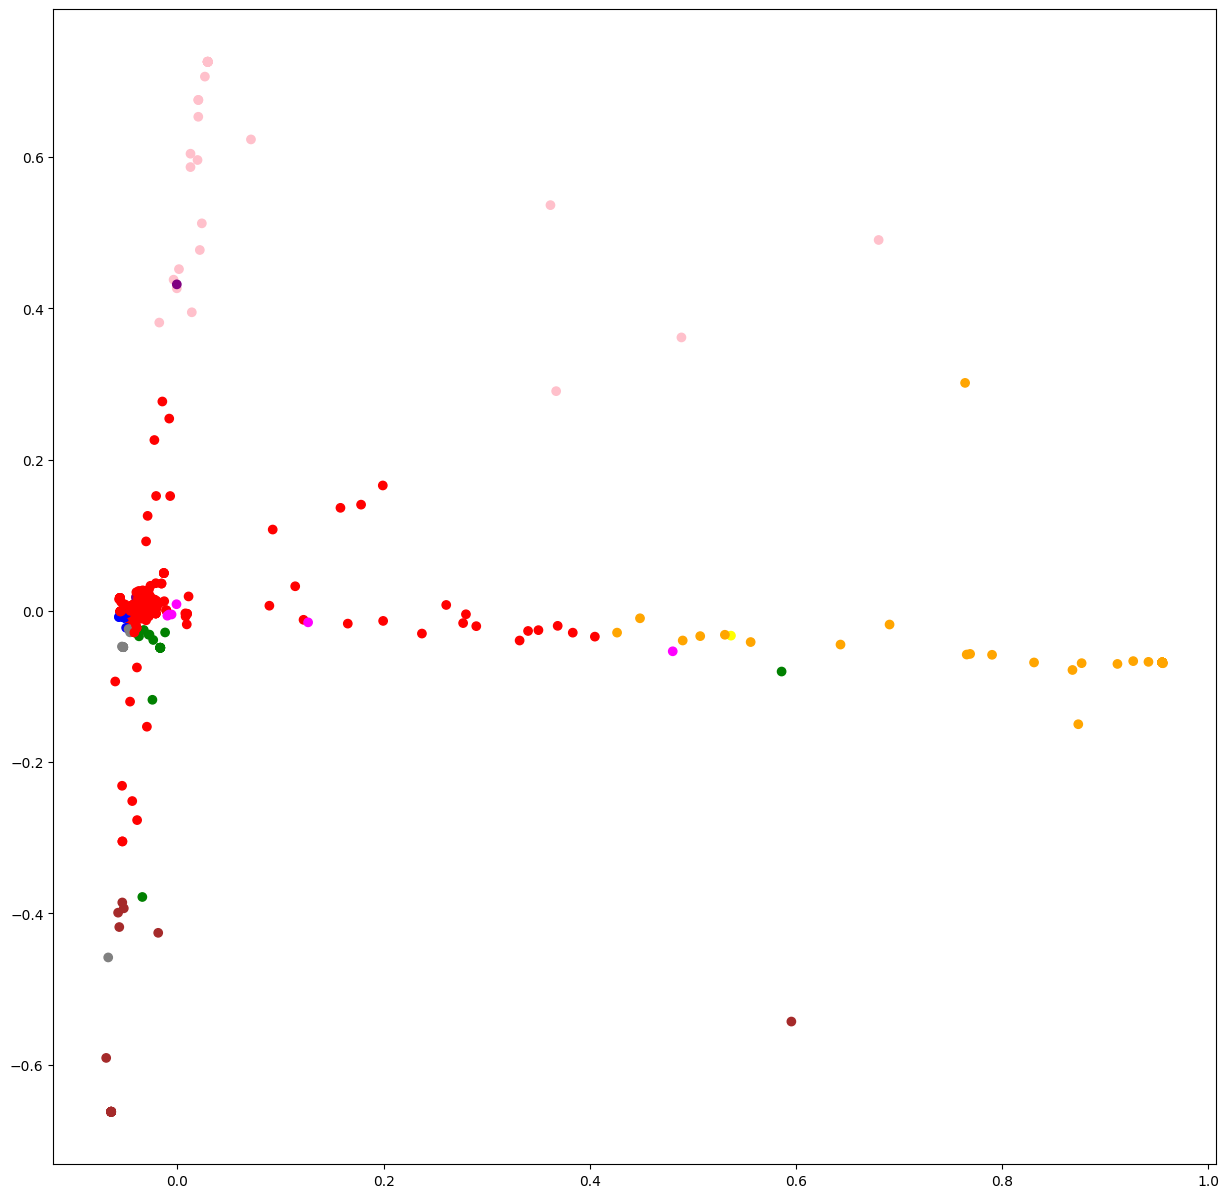

<Figure size 640x480 with 0 Axes>

In [ ]:
#Визуализация
kmeans_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = {
    0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'magenta',
    5: 'pink', 6: 'grey', 7: 'yellow', 8: 'brown', 9: 'purple'
}

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans_indices])

plt.show()
plt.savefig('trc.png')


Тематическое моделирование LDA

In [ ]:
# Создаем словарь из получившихся токенов

gensim_dictionary_for_TM = gensim.corpora.Dictionary(preprocessed_texts)
gensim_dictionary_for_TM.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary_for_TM.compactify()
print(gensim_dictionary_for_TM)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<886 unique tokens: ['my', 'up', 'блять', 'давайте', 'делаю']...>


In [ ]:
corpus = [gensim_dictionary_for_TM.doc2bow(text) for text in preprocessed_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# раскладываем по "мешкам"

lda = gensim.models.LdaMulticore(corpus,
                                 num_topics = 10, # число топиков
                                 id2word=gensim_dictionary_for_TM,
                                 passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
lda.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.021*"любви" + 0.015*"небо" + 0.013*"боль" + 0.011*"внутри" + 0.010*"ночь" + 0.009*"дом" + 0.009*"город" + 0.008*"дай" + 0.008*"весна" + 0.008*"игра"'),
 (1,
  '0.020*"город" + 0.020*"бит" + 0.016*"двоих" + 0.015*"мясо" + 0.014*"ка" + 0.013*"дайте" + 0.013*"свет" + 0.011*"no" + 0.010*"скоро" + 0.010*"дни"'),
 (2,
  '0.015*"край" + 0.015*"чём" + 0.015*"земли" + 0.015*"пути" + 0.014*"выше" + 0.013*"беги" + 0.013*"делать" + 0.011*"стой" + 0.009*"скажи" + 0.009*"че"'),
 (3,
  '0.029*"нахуй" + 0.021*"устал" + 0.017*"блядь" + 0.013*"хотел" + 0.012*"чисто" + 0.011*"навсегда" + 0.010*"смотри" + 0.010*"рот" + 0.009*"люблю" + 0.008*"топор"'),
 (4,
  '0.014*"мама" + 0.014*"прости" + 0.014*"моей" + 0.010*"нужен" + 0.009*"последний" + 0.008*"дети" + 0.007*"дома" + 0.007*"шанс" + 0.007*"никому" + 0.007*"сука"'),
 (5,
  '0.024*"чё" + 0.012*"сука" + 0.012*"хуй" + 0.012*"люблю" + 0.011*"типа" + 0.010*"похуй" + 0.010*"хули" + 0.009*"ага" + 0.008*"блять" + 0.008*"москва"'),
 (6,
  '0.021*"verse"

Визуализация LDA

In [ ]:
# Визуализация с помощью pyLDAvis
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis = gensimvis.prepare(lda, corpus, gensim_dictionary_for_TM)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.082090 -0.058708       1        1  16.477423
4     -0.004387 -0.022753       2        1  13.888778
0     -0.147335  0.009824       3        1  12.807901
8      0.268686  0.090986       4        1  10.028300
3     -0.018041 -0.020674       5        1   9.475688
9      0.017201 -0.130659       6        1   8.623178
2      0.004668 -0.044167       7        1   8.257907
6     -0.064930  0.013154       8        1   7.772231
1     -0.052714 -0.044624       9        1   7.616517
7     -0.085238  0.207622      10        1   5.052077, topic_info=       Term        Freq       Total Category  logprob  loglift
33      the  249.000000  249.000000  Default  30.0000  30.0000
173     you  246.000000  246.000000  Default  29.0000  29.0000
523   делай  151.000000  151.000000  Default  28.0000  28.0000
752       a  187.000000  187.000000  Default  27.0000  27.0000
476      ха  269.000000  269.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
89    равно   21.694030  111.325939  Topic10  -4.8230   1.3499
106     мою   21.908938  135.652886  Topic10  -4.8132   1.1622
277  больно   18.495414   86.263370  Topic10  -4.9826   1.4455
236   кровь   21.650493  166.275782  Topic10  -4.8251   0.9468
154   люблю   22.213279  230.888041  Topic10  -4.7994   0.6441

[484 rows x 6 columns], token_table=      Topic      Freq Term
term                      
752       1  0.005326    a
752       4  0.942762    a
752       6  0.005326    a
752       8  0.010653    a
752      10  0.031958    a
...     ...       ...  ...
428       3  0.242135   яд
428       4  0.053808   яд
428       8  0.134519   яд
428       9  0.080712   яд
428      10  0.349751   яд

[2797 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 1, 9, 4, 10, 3, 7, 2, 8])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


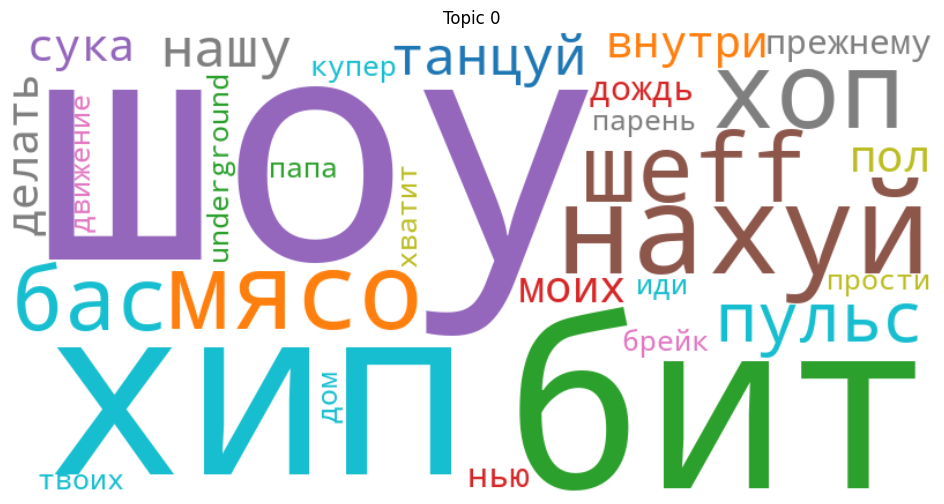

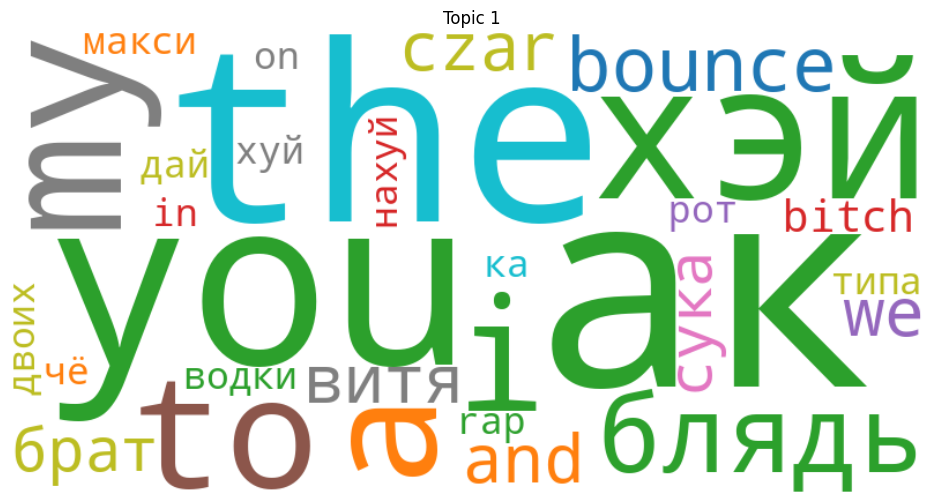

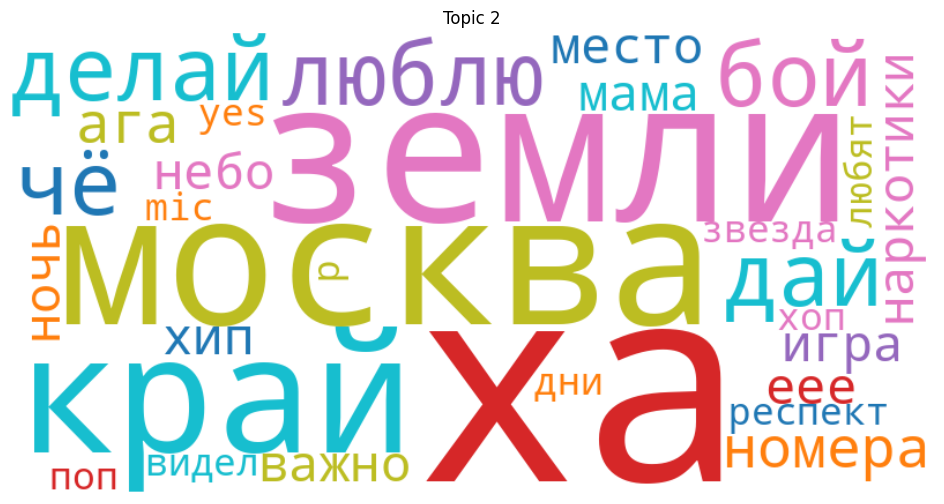

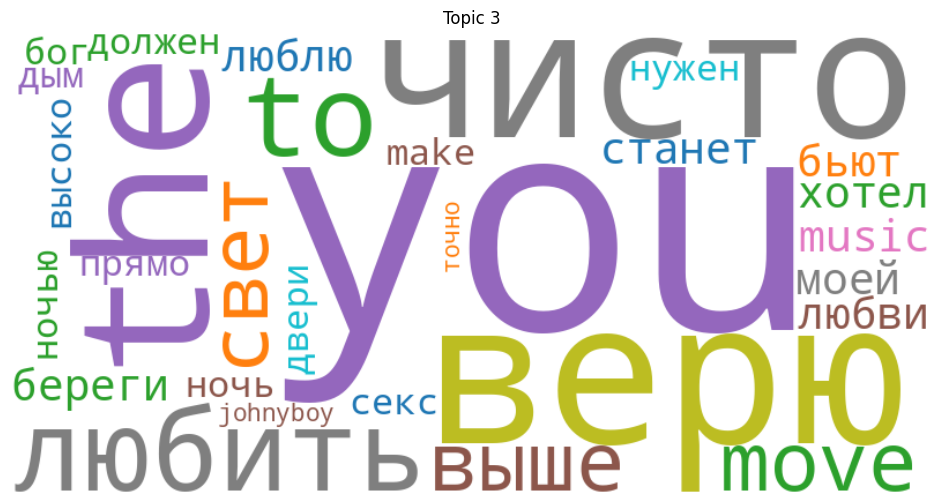

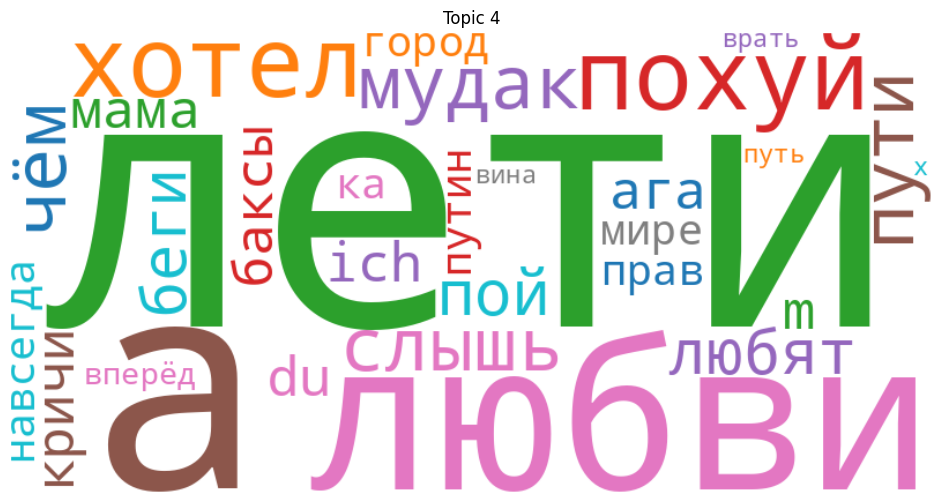

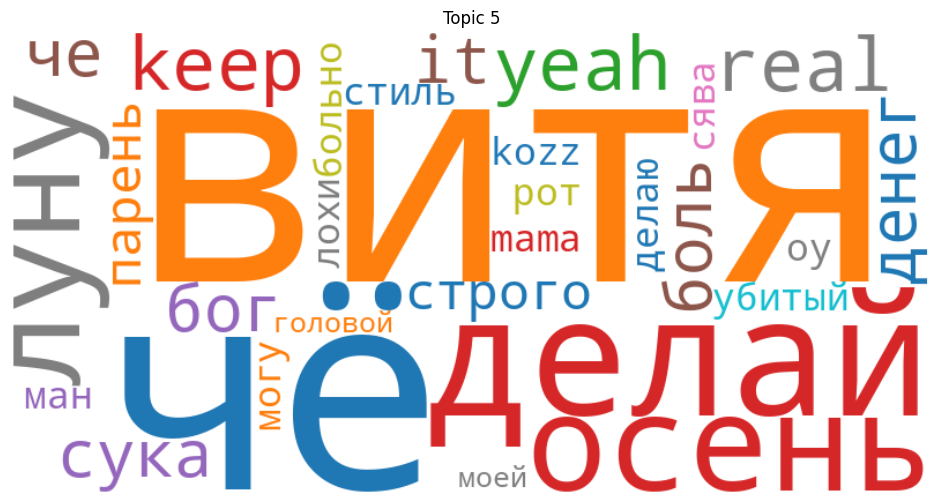

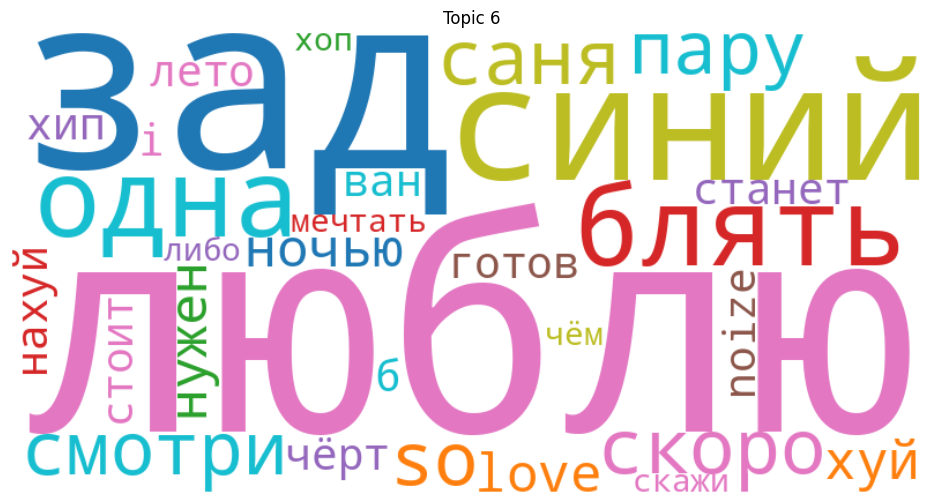

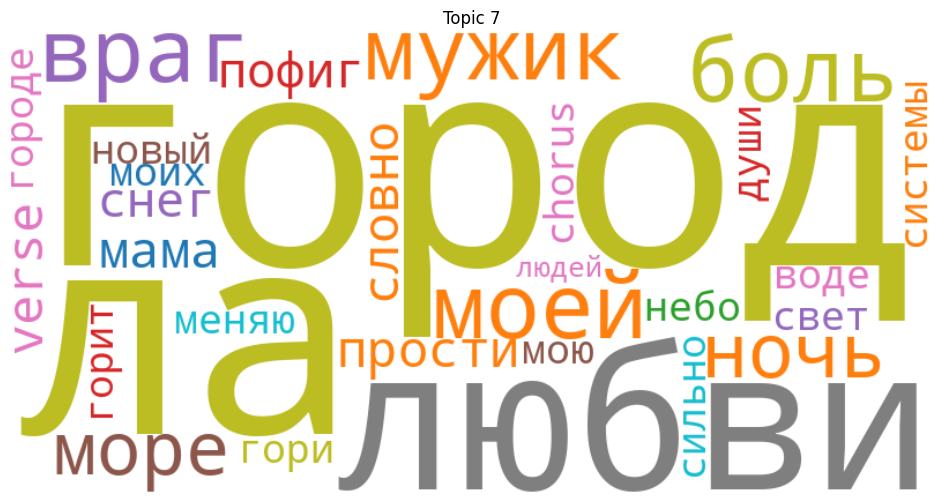

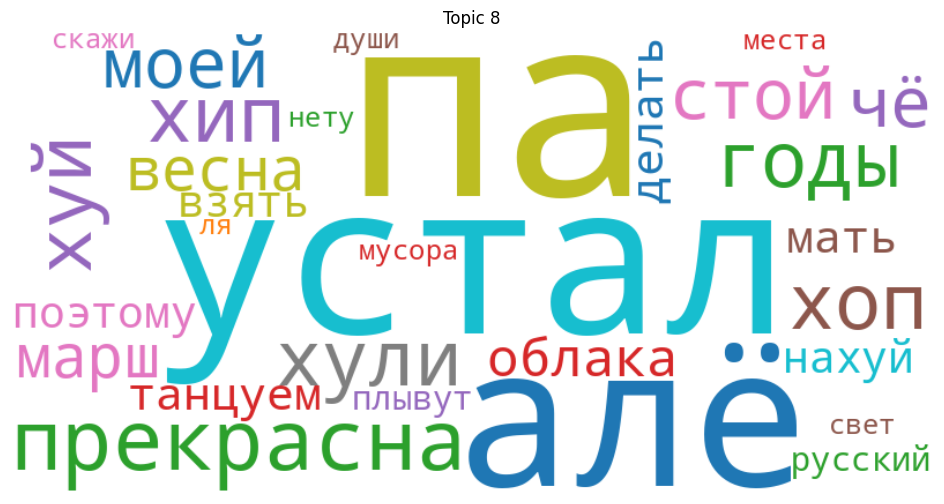

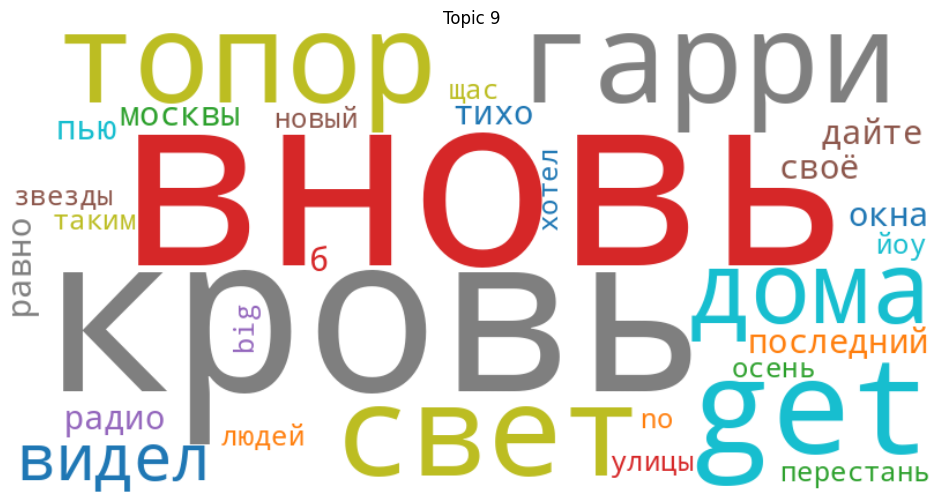

In [ ]:
# Визуализироем с помощью вордклауд

num_topics = 10

for topic in lda.show_topics(num_topics=num_topics, num_words=30, formatted=False):
    topic_num = topic[0]
    words = dict(topic[1])
    weights = {word: round(weight * 1000) for word, weight in words.items()}

    wordcloud = WordCloud(background_color="white", width=800, height=400, colormap="tab10").generate_from_frequencies(weights)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()